<h1><span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Содержание" data-toc-modified-id="Содержание-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Содержание</a></span></li><li><span><a href="#1.Обработка-Данных" data-toc-modified-id="1.Обработка-Данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>1.Обработка Данных</a></span></li><li><span><a href="#3.Подготовка-расчётных-данных" data-toc-modified-id="3.Подготовка-расчётных-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3.Подготовка расчётных данных</a></span></li><li><span><a href="#4.Анализ-Данных" data-toc-modified-id="4.Анализ-Данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>4.Анализ Данных</a></span></li><li><span><a href="#5.Проверка-гипотез-(анализ-выручки)" data-toc-modified-id="5.Проверка-гипотез-(анализ-выручки)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>5.Проверка гипотез (анализ выручки)</a></span></li><li><span><a href="#6.Гистограммы-для-распределения-выручки." data-toc-modified-id="6.Гистограммы-для-распределения-выручки.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>6.Гистограммы для распределения выручки.</a></span></li><li><span><a href="#7.Вывод" data-toc-modified-id="7.Вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>7.Вывод</a></span></li></ul></div>

<h1>Содержание</h1>


<ol>
  <li >Обработка Данных</li>
     <li> Подготовка Данных </li>
     <li> Подготовка расчётных данных</li>
     <li>Анализ Данных</li>
     <li>Проверка гипотез (анализ выручки)</li>
   <li> Гистограммы для распределения выручки</li>
    <li>Вывод</li>

</ol>

<h1 name = 'Analys'>1.Обработка Данных</h1>

In [1]:
#Импортируем все необходимые нам библиотеки
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
pd.set_option('display.float_format', '{:,.2f}'.format)
calls = pd.read_csv('/datasets/calls.csv')

calls.info()


#Округлим в большую сторону.
calls['duration'] = calls['duration'].apply(math.ceil)
display(calls)


internet = pd.read_csv('/datasets/internet.csv')
#Округлим в большую сторону и переведем сразу в ГБ
internet['gb_used'] = (internet['mb_used']/1024).apply(math.ceil)
display(internet)
internet.info()


messages = pd.read_csv('/datasets/messages.csv')
display(messages)
messages.info()


tariffs = pd.read_csv('/datasets/tariffs.csv')
display(tariffs)
tariffs.info()

users = pd.read_csv('/datasets/users.csv')
display(users)
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1,1499
202603,1499_216,2018-10-18,19,1499
202604,1499_217,2018-11-10,11,1499
202605,1499_218,2018-10-06,5,1499


,Unnamed: 0,id,mb_used,session_date,user_id,gb_used
0,0,1000_0,112.95,2018-11-25,1000,1
1,1,1000_1,"1,052.81",2018-09-07,1000,2
2,2,1000_2,"1,197.26",2018-06-25,1000,2
3,3,1000_3,550.27,2018-08-22,1000,1
4,4,1000_4,302.56,2018-09-24,1000,1
...,...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499,1
149392,149392,1499_153,490.13,2018-12-14,1499,1
149393,149393,1499_154,0.00,2018-10-27,1499,0
149394,149394,1499_155,"1,246.32",2018-11-26,1499,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
gb_used         149396 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


#2.Подготовка Данных

In [3]:
#Корректируем название столбца с тарифом для корректного слияния:
tariffs.rename(columns=lambda x: x.replace('tariff_name', 'tariff'), inplace=True)
tariffs.head()
#Объединяем таблицы по данным столбца с тарифом:
users = users.merge(tariffs, on = 'tariff', how = 'left')
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,50,15360,500,550,200,3,3
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,1000,30720,3000,1950,150,1,1


In [4]:
#Фильтруем звонки с нулевой длительностью:
calls_0 = calls[calls['duration'] == 0]
calls_part = len(calls_0)/len(calls)
print('В таблице {} строк с пропущенными звонками, то есть {:.2%} всей выборки.'.format(len(calls_0), calls_part))

В таблице 39613 строк с пропущенными звонками, то есть 19.55% всей выборки.



Таких значений оказалось слишком много, чтобы просто избавиться от них. Так как звонок зафиксирован сетью, мобильный оператор снял за него деньги за 1 минуту разговора. Заменим все нулевые значения длительности единицами, а все минуты разговора округлим в большую сторону.

Поскольку тарифный план предусматривает ежемесячную оплату, сразу сгруппируем помесячно все данные по звонкам, интернет-трафику и сообщениям.

In [5]:
calls.loc[calls['duration'] == 0, 'duration'] = 1
calls['duration_rounded'] = np.ceil(calls.duration).astype(int)
calls['call_date'] = calls['call_date'].astype('datetime64[ns]')
calls['month'] = pd.to_datetime(calls['call_date']).dt.strftime('%m %B')
calls_grouped = calls.pivot_table(index = ['user_id','month'], values = 'duration_rounded', aggfunc = 'sum').reset_index()
calls_grouped.columns = ['user_id', 'month', 'duration_rounded']
display(calls_grouped.sample(5))

,user_id,month,duration_rounded
2205,1354,09 September,312
2614,1412,08 August,870
216,1033,11 November,438
515,1081,11 November,674
2993,1471,02 February,77


Таким же образом округлим до целых мегабайт показатели интернет-трафика и сгруппируем данные по месяцам.


In [6]:
internet['mb_used_rounded'] = np.ceil(internet.mb_used).astype(int)
#Удалим столбец, дублирующий индексы таблицы:
internet = internet.drop(['Unnamed: 0'], axis = 1)
#Добавим месяц использования трафика:
internet['session_date'] = internet['session_date'].astype('datetime64[ns]')
internet['month'] = pd.to_datetime(internet['session_date']).dt.strftime('%m %B')
#Сгруппируем данные помесячно:
internet_grouped = internet.pivot_table(index = ['user_id','month'], values = 'mb_used_rounded', aggfunc = 'sum').reset_index()
internet_grouped.columns = ['user_id', 'month', 'mb_used_rounded']
display(internet_grouped.sample(5))

,user_id,month,mb_used_rounded
2318,1370,03 March,23268
3020,1471,11 November,9123
868,1135,12 December,18454
646,1101,11 November,9880
1092,1172,12 December,23711


Аналогично сгруппируем данные по сообщениям.

In [7]:
messages['session_date'] = messages['message_date'].astype('datetime64[ns]')
messages['month'] = pd.to_datetime(messages['message_date']).dt.strftime('%m %B')
#Сгруппируем данные помесячно:
messages_grouped = messages.pivot_table(index = ['user_id','month'], values = 'message_date', aggfunc = 'count').reset_index()
messages_grouped.columns = ['user_id', 'month', 'messages_number']
display(messages_grouped.sample(5))

,user_id,month,messages_number
2171,1404,07 July,48
38,1005,11 November,51
2514,1465,06 June,52
2651,1487,09 September,23
659,1123,10 October,17


In [8]:
#Сначала сливаем данные по месяцам и id пользователей, потом привязываем их к ФИО и личным данным клиентов:
data = internet_grouped.merge(messages_grouped, on = ['user_id', 'month'], how = 'outer')
data = data.merge(calls_grouped, on = ['user_id', 'month'], how = 'outer')
data = data.merge(users, on = 'user_id', how = 'outer')
data.info()
data.tail()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 19 columns):
user_id                  3216 non-null int64
month                    3214 non-null object
mb_used_rounded          3203 non-null float64
messages_number          2717 non-null float64
duration_rounded         3174 non-null float64
age                      3216 non-null int64
churn_date               189 non-null object
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null object
tariff                   3216 non-null object
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message          3216 non-null int64
rub_per_minute           3216 non-null int64
dtypes: float64(3), int64(

,user_id,month,mb_used_rounded,messages_number,duration_rounded,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
3211,1273,10 October,nan,35.00,320.00,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra,1000,30720,3000,1950,150,1,1
3212,1273,11 November,nan,29.00,286.00,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra,1000,30720,3000,1950,150,1,1
3213,1273,12 December,nan,39.00,263.00,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra,1000,30720,3000,1950,150,1,1
3214,1128,NaN,nan,nan,nan,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,1000,30720,3000,1950,150,1,1
3215,1371,NaN,nan,nan,nan,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,50,15360,500,550,200,3,3


В столбцах mb_used_rounded, messages_number, duration_rounded после объединения появились пустые значения. Кто-то из клиентов сети использует интернет, но не звонит, или общается только с помощью сообщений. Заменяем в этих столбцах пустые ячейки на нулевые, а вещественный тип данных на целочисленный.

In [9]:
columns_na = ['mb_used_rounded', 'messages_number', 'duration_rounded']
data[columns_na] = data[columns_na].fillna(0).astype(int)
display(data[data['month'].isna()])

,user_id,month,mb_used_rounded,messages_number,duration_rounded,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
3214,1128,NaN,0,0,0,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,1000,30720,3000,1950,150,1,1
3215,1371,NaN,0,0,0,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,50,15360,500,550,200,3,3


<h1>3.Подготовка расчётных данных</h1>

In [10]:
#Создаем столбцы, в которые попадёт сумма выручки компании при превышении клиентом лимита по тарифам:
data['revenue_calls'] = (data['duration_rounded'] - data['minutes_included']) * data['rub_per_minute']
data['revenue_internet'] = (data['mb_used_rounded'] - data['mb_per_month_included']) * data['rub_per_gb'] / 1024
data['revenue_messages'] = (data['messages_number'] - data['messages_included']) * data['rub_per_message']
#В случае, если превышения нет, оставим в этих столбцах нули:
data.loc[data['revenue_calls'] < 0, 'revenue_calls'] = 0
data.loc[data['revenue_internet'] < 0, 'revenue_internet'] = 0
data.loc[data['revenue_messages'] < 0, 'revenue_messages'] = 0
#Итоговая выручка складывается из тарифа и оплаты за превышение трафика, лимита минут и сообщений:
data['revenue_month'] = data['rub_monthly_fee'] + data['revenue_calls'] + data['revenue_internet'] + data['revenue_messages']

Итак:

Информация об использовании тарифов сгруппирована по месяцам;

Собрана из разрозненных файлов в единый датафрейм;

Данные проверены на ошибки;

Убраны пустые значения;

В таблицу добавлен расчётный столбец ежемесячной выручки по каждому пользователю.

Приступаем к анализу полученных данных.

<h1>4.Анализ Данных</h1>

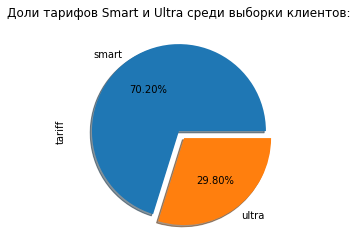

In [11]:
#Диаграмма на основе данных списка клиентов:
users['tariff'].value_counts().plot(kind = 'pie', autopct='%1.2f%%', explode = (0, 0.1), shadow = True)
plt.title('Доли тарифов Smart и Ultra среди выборки клиентов:')
plt.show()

70% клиентов "Мегалайна" предпочитают универсальный и недорогой тариф Smart.

Проверим, как меняются доли тарифов в выборке по месяцам. Возможно, не всегда соотношение было таким.

In [12]:
#Группируем таблицу по месяцу и тарифу. Данные - количество пользователей.
grouped_data = data.groupby(['month', 'tariff'])['user_id'].count().reset_index().sort_values(by = ['month','user_id'])
grouped_data.columns = ['month', 'tariff', 'count_users_part']
#Групппируем таблицу только по месяцу без разбивки по тарифам.
grouped_data_2 = data.groupby('month')['user_id'].count().reset_index()
grouped_data_2.columns = ['month', 'count_users_total']
#Объединяем обе таблицы по месяцу:
grouped_data = grouped_data.merge(grouped_data_2, on = 'month', how = 'left').sort_values(by = ['month','tariff'])
#Добавляем столбец с долей пользователя конкретного тарифа от общего количества пользователей:
grouped_data['%'] = grouped_data['count_users_part'] * 100/ grouped_data['count_users_total']
grouped_data.head(4)

,month,tariff,count_users_part,count_users_total,%
1,01 January,smart,34,43,79.07
0,01 January,ultra,9,43,20.93
3,02 February,smart,58,82,70.73
2,02 February,ultra,24,82,29.27


В первую очередь посмотрим на характеристики распределения данных.

In [13]:
data_ultra = data.query('tariff == "ultra"')
data_smart = data.query('tariff == "smart"')
print('Характеристики распределения длительности разговора, интернет-трафика и количества сообщений для тарифа "Smart":')
display(data_smart[['duration_rounded', 'mb_used_rounded', 'messages_number']].describe().loc[['mean', \
'std']].append(pd.Series(np.var(data_smart[['duration_rounded', 'mb_used_rounded', \
'messages_number']], ddof = 1), name = 'var')).style.format('{:.2f}'))

print('Характеристики распределения длительности разговора, интернет-трафика и количества сообщений для тарифа "Ultra":')
display(data_ultra[['duration_rounded', 'mb_used_rounded', 'messages_number']].describe().loc[['mean', \
'std']].append(pd.Series(np.var(data_ultra[['duration_rounded', 'mb_used_rounded', \
'messages_number']], ddof = 1), name = 'var')).style.format('{:.2f}'))

Характеристики распределения длительности разговора, интернет-трафика и количества сообщений для тарифа "Smart":


,duration_rounded,mb_used_rounded,messages_number
mean,429.26,16221.91,33.37
std,195.04,5886.30,28.23
var,38040.44,34648523.30,796.96


Характеристики распределения длительности разговора, интернет-трафика и количества сообщений для тарифа "Ultra":


,duration_rounded,mb_used_rounded,messages_number
mean,540.23,19467.14,49.31
std,326.03,10110.26,47.81
var,106294.60,102217264.28,2285.42


По характеристикам распределения можно сделать выводы:

Средняя длительность разговора не сильно зависит от тарифа. В среднем человеку нужно около 430 минут разговора на тарифе "Smart" и 540 - на тарифе "Ultra". Среднее и медиана у распределения близки, т.е. выбросов немного.
Сообщения сейчас не в моде. Пользователи обоих тарифов за редким исключением не превышают лимит.
Основные различия касаются объема интернет-трафика. Пользователи тарифа "Smart" превышают лимит 15Гб и платят за дополнительные мегабайты чаще, чем в половине случаев. Пользователи "Ultra" используют интернет активнее (в среднем на 3Гб), но больше чем в 75% случаев не выходят за увеличенный лимит в 30Гб.


Для наглядности построим сравнительные графики длительности разговора, отправки смс и активности пользователя в сети в зависимости от выбранного тарифа.

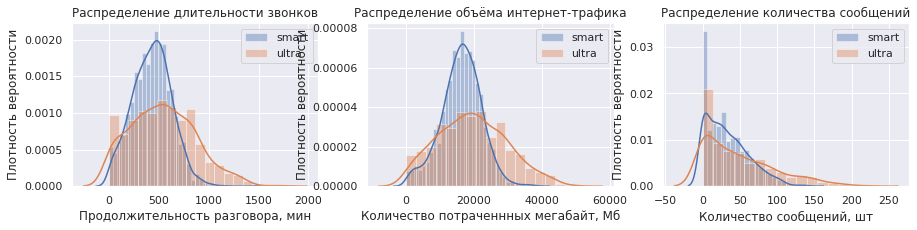

In [14]:
#Строим гистограммы распределений ежемесячной длительности разговора, количества сообщений и объема интернет-трафика:
#tariff = data['tariff']
sns.set()
fig,axes=plt.subplots(1,3)
fig.set_size_inches(15, 3)
for tariff in ['smart', 'ultra']:
  ax = sns.distplot(data.query('tariff == @tariff')['duration_rounded'], label = tariff, ax = axes[0])
  ax1 = sns.distplot(data.query('tariff == @tariff')['mb_used_rounded'], label = tariff, ax = axes[1])
  ax2 = sns.distplot(data.query('tariff == @tariff')['messages_number'], label = tariff, ax = axes[2])

ax.set(title = "Распределение длительности звонков",
      xlabel = "Продолжительность разговора, мин",
      ylabel = "Плотность вероятности")
ax1.set(title = "Распределение объёма интернет-трафика",
      xlabel = "Количество потраченнных мегабайт, Мб",
      ylabel = "Плотность вероятности")
ax2.set(title = "Распределение количества сообщений",
      xlabel = "Количество сообщений, шт",
      ylabel = "Плотность вероятности")
      
ax.legend()
ax1.legend()
ax2.legend()
plt.show()



В целом поведение пользователя в обоих случаях похожее, но на графиках видно смещение вправо распределения длительности звонков и объёма интернет-трафика по тарифу "Ultra". Лимиты больше - использование свободнее.

Эти распределения близки к нормальным. Распределение количества сообщений стремится к экспоненциальному виду. Максимум около нуля. Пользователей, отправляющих много sms, мало.

<h1>5.Проверка гипотез (анализ выручки)</h1>


In [15]:
print('Характеристики распределения ежемесячной выручки по тарифу "Smart":')
display(data_smart[['revenue_month']].describe().style.format('{:.2f}'))
print('Характеристики распределения ежемесячной выручки по тарифу "Ultra":')
display(data_ultra[['revenue_month']].describe().style.format('{:.2f}'))

Характеристики распределения ежемесячной выручки по тарифу "Smart":


,revenue_month
count,2230.00
mean,1250.01
std,796.99
min,550.00
25%,553.00
50%,985.75
75%,1700.88
max,6765.02


Характеристики распределения ежемесячной выручки по тарифу "Ultra":


,revenue_month
count,986.00
mean,2060.42
std,356.14
min,1950.00
25%,1950.00
50%,1950.00
75%,1950.00
max,4743.31


<h1>6.Гистограммы для распределения выручки.</h1>

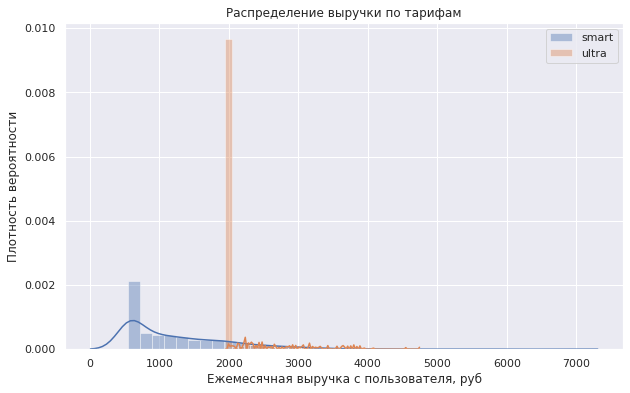

In [16]:
sns.set()
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
for tariff in ['smart', 'ultra']:
  ax = sns.distplot(data.query('tariff == @tariff')['revenue_month'], label = tariff)
ax.set(title = "Распределение выручки по тарифам",
      xlabel = "Ежемесячная выручка с пользователя, руб",
      ylabel = "Плотность вероятности")
      
ax.legend()
plt.show()

График наглядно показывает, что выручка подчиняется экспоненциальному распределению. Пик в обоих случаях - выручка, равная абонентской плате. Меньше сумма быть не может. Количество пользователей, превышающих лимит по включенным ресурсам - больше половины на тарифе "Smart" и меньше 25% на тарифе "Ultra".

Проверим гипотезу H0 о том, что средняя выручка по тарифу "Smart" и "Ultra" в двух соответствующих генеральных совокупностях одинакова.



In [17]:
alpha = 0.05
results = st.ttest_ind(
    data_smart['revenue_month'], 
    data_ultra['revenue_month'],
    equal_var = False)
print('p-значение:', results.pvalue)
 
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3058658861538062e-282
Отвергаем нулевую гипотезу


Уровень значимости статистики разности средних наших показателей (p-value) исчезающе мал, поэтому принимаем альтернативную гипотезу: с высокой вероятностью средняя выручка по тарифам отличается, как и в нашей выборке.

In [18]:
print('Средняя выручка с пользователя по тарифу "Smart" {:.2f} рублей.'.format(data_smart['revenue_month'].mean()))
print('Средняя выручка с пользователя по тарифу "Ultra" {:.2f} рублей.'.format(data_ultra['revenue_month'].mean()))

Средняя выручка с пользователя по тарифу "Smart" 1250.01 рублей.
Средняя выручка с пользователя по тарифу "Ultra" 2060.42 рублей.


Проверим еще одну гипотезу: выручка по тарифам не зависит от города проживания абонента (одинакова в Москве и регионах).

In [19]:
#Формируем столбец с разбивкой Москва/регионы:
data['moscow_regions'] = (data['city'] == 'Москва')
data.loc[data['moscow_regions'] == True, 'moscow_regions'] = 'Москва'
data.loc[data['moscow_regions'] == False, 'moscow_regions'] = 'Регионы'
data['moscow_regions'].unique()

array(['Регионы', 'Москва'], dtype=object)

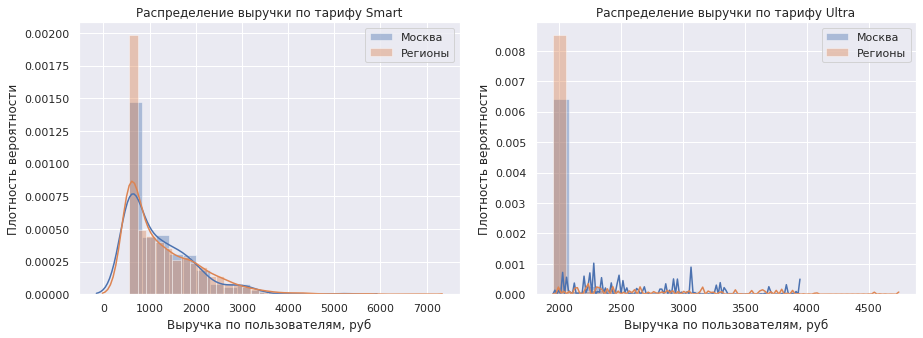

In [20]:
#Строим гистограмму распределения выручки по заданному критерию:
#Примечание: в тренажере, видимо, не установлен последний seaborn, нужный график не отображается. Выведу другой.
#sns.displot(data=data.sort_values(by = 'tariff'),
#            x='revenue_month',
#            hue='tariff',
#            col='moscow_regions',
#            bins=30,
#            kde=True)
#plt.show()

sns.set()
fig,axes=plt.subplots(1,2)
fig.set_size_inches(15, 5)
for regions in ['Москва', 'Регионы']:
  ax = sns.distplot(data.query('tariff == "smart" and moscow_regions == @regions')['revenue_month'], label = regions, ax = axes[0])
  ax1 = sns.distplot(data.query('tariff == "ultra"and moscow_regions == @regions')['revenue_month'], label = regions, ax = axes[1])

ax.set(title = "Распределение выручки по тарифу Smart",
      xlabel = "Выручка по пользователям, руб",
      ylabel = "Плотность вероятности")
ax1.set(title = "Распределение выручки по тарифу Ultra",
      xlabel = "Выручка по пользователям, руб",
      ylabel = "Плотность вероятности")
      
ax.legend()
ax1.legend()
plt.show()

In [21]:
data_smart_moscow = data.query('tariff == "smart" and moscow_regions == "Москва"')
data_smart_regions = data.query('tariff == "smart" and moscow_regions == "Регионы"')
print('Характеристики распределения ежемесячной выручки по тарифу "Smart" в Москве:')
display(data_smart_moscow[['revenue_month']].describe().style.format('{:.2f}'))
print('Характеристики распределения ежемесячной выручки по тарифу "Smart" в регионах:')
display(data_smart_regions[['revenue_month']].describe().style.format('{:.2f}'))

data_ultra_moscow = data.query('tariff == "ultra" and moscow_regions == "Москва"')
data_ultra_regions = data.query('tariff == "ultra" and moscow_regions == "Регионы"')
print('Характеристики распределения ежемесячной выручки по тарифу "Ultra" в Москве:')
display(data_ultra_moscow[['revenue_month']].describe().style.format('{:.2f}'))
print('Характеристики распределения ежемесячной выручки по тарифу "Ultra" в регионах:')
display(data_ultra_regions[['revenue_month']].describe().style.format('{:.2f}'))

Характеристики распределения ежемесячной выручки по тарифу "Smart" в Москве:


,revenue_month
count,386.00
mean,1198.43
std,727.73
min,550.00
25%,550.00
50%,979.55
75%,1624.09
max,5222.43


Характеристики распределения ежемесячной выручки по тарифу "Smart" в регионах:


,revenue_month
count,1844.00
mean,1260.81
std,810.51
min,550.00
25%,556.00
50%,987.93
75%,1723.11
max,6765.02


Характеристики распределения ежемесячной выручки по тарифу "Ultra" в Москве:


,revenue_month
count,225.00
mean,2063.63
std,330.57
min,1950.00
25%,1950.00
50%,1950.00
75%,1950.00
max,3945.26


Характеристики распределения ежемесячной выручки по тарифу "Ultra" в регионах:


,revenue_month
count,761.00
mean,2059.47
std,363.56
min,1950.00
25%,1950.00
50%,1950.00
75%,1950.00
max,4743.31


По графикам и характеристикам распределения выручки по Москве и регионам можно увидеть:

Характер распределения выручки по обоим тарифам в Москве и за её пределами одинаков;
Средняя выручка в регионах чуть выше, чем аналогичный показатель по Москве.
Проведем тест, чтобы отвергнуть/подтвердить нулевую гипотезу отдельно по каждому тарифу.



In [22]:
#Проверяем гипотезу о равенстве выручки по тарифу Smart:
alpha = 0.05
results = st.ttest_ind(
    data_smart_moscow['revenue_month'], 
    data_smart_regions['revenue_month'],
    equal_var = True)
print('p-значение:', results.pvalue)
 
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.16206691957539598
Не получилось отвергнуть нулевую гипотезу


In [23]:
#Проверяем гипотезу о равенстве выручки по тарифу Ultra:
alpha = 0.05
results = st.ttest_ind(
    data_ultra_moscow['revenue_month'], 
    data_ultra_regions['revenue_month'],
    equal_var = True)
print('p-значение:', results.pvalue)
 
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.8777956407389418
Не получилось отвергнуть нулевую гипотезу


Вероятность ошибки при отклонении этой гипотезы - болльше 88%. То есть с высокой долей вероятности мы можем утверждать, что по тарифу "Ultra" выручка будет одинаковой по всей стране и будет примерно равна абонентской плате. Это подтверждает наша выборка - большинство абонентов укладывается в ежемесячные лимиты, установленные оператором.

Третьим этапом сравним выручку сотового оператора по локации абонентов без разбивки по тарифам. Нулевая гипотеза - выручка одинакова вне зависимости от региона.

Считаем характеристики распределения выручки по Москве и регионам.

In [24]:
data_moscow = data.query('moscow_regions == "Москва"')
data_regions = data.query('moscow_regions == "Регионы"')
print('Характеристики распределения ежемесячной выручки оператора в Москве:')
display(data_moscow[['revenue_month']].describe().style.format('{:.2f}'))
print('Характеристики распределения ежемесячной выручки оператора в регионах:')
display(data_regions[['revenue_month']].describe().style.format('{:.2f}'))

Характеристики распределения ежемесячной выручки оператора в Москве:


,revenue_month
count,611.00
mean,1517.04
std,740.82
min,550.00
25%,766.00
50%,1730.27
75%,1950.00
max,5222.43


Характеристики распределения ежемесячной выручки оператора в регионах:


,revenue_month
count,2605.00
mean,1494.12
std,797.17
min,550.00
25%,703.00
50%,1544.34
75%,1950.00
max,6765.02


In [25]:
#Проверяем гипотезу о равенстве выручки в целом по Москве/регионам:
alpha = 0.05
results = st.ttest_ind(
    data_moscow['revenue_month'], 
    data_regions['revenue_month'],
    equal_var = False)
print('p-значение:', results.pvalue)
 
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.4978851055485567
Не получилось отвергнуть нулевую гипотезу


Таким образом, вероятность ошибки при отклонении нулевой гипотезы около 50%. Или ошибёмся, или нет :). Принимаем, что выручка оператора не зависит от места проживания абонента.

<h1>7.Вывод</h1>

Проведя статистический анализ выборки из 500 абонентов сотового оператора, можем сделать следующие выводы:

Основные различия между пользовательским поведением - значительное увеличение потребления интернет-трафика на тарифе "Ultra". Длительность звонков и отправка сообщений значительно не различаются.
Пользователи тарифа "Smart" в половине случаев не укладываются в лимиты звонков и трафика, но даже с учетом оплаты сверх лимита тратят в среднем меньше суммы абонентской платы тарифа "Ultra".
Тариф "Ultra" более выгоден для мобильного оператора. Меньше 25% пользователей превышают лимиты, но средняя выручка выше за счет высокой абонентской платы.